In [ ]:
!pip install lyricsgenius

     |████████████████████████████████| 61kB 7.0MB/s 


In [ ]:
#libraries used to extract, clean and manipulate the data
#from helpers import *
import pandas as pd
import numpy as np
import string
#To plot the graphs
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#library used to count the frequency of words
from sklearn.feature_extraction.text import CountVectorizer
#To create the sentiment analysis model, tokenization and lemmatization
import nltk
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
import nltk.data
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [ ]:
import lyricsgenius as genius
import pandas as pd
import string 

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')      


def search_data(query,n,access_token):
    """
    This function uses the library lyricsgenius to extract the fields
    title, artist, album, date and lyrics and stores them into a pandas dataframe
    parameters:
    query = artist or band to search
    n = max numbers of songs
    access_token = your access token of the genius api
    """
    
    api = genius.Genius(access_token)

    list_lyrics = []
    list_title = []
    list_artist = []
    list_album = []
    list_year = []

    artist = api.search_artist(query,max_songs=n,sort='popularity')
    songs = artist.songs
    for song in songs:
        list_lyrics.append(song.lyrics)
        list_title.append(song.title)
        list_artist.append(song.artist)
        #list_album.append(song.album)
        #list_year.append(song.year)

    df = pd.DataFrame({'artist':list_artist,'title':list_title,
                        'lyric':list_lyrics})
    
    return df

def clean_lyrics(df,column):
    """
    This function cleans the words without importance and fix the format of the  dataframe's column lyrics 
    parameters:
    df = dataframe
    column = name of the column to clean
    """
    df = df
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace(r"verse |[1|2|3]|chorus|bridge|outro","").str.replace("[","").str.replace("]","")
    df[column] = df[column].str.lower().str.replace(r"instrumental|intro|guitar|solo","")
    df[column] = df[column].str.replace("\n"," ").str.replace(r"[^\w\d'\s]+","").str.replace("efil ym fo flah","")
    df[column] = df[column].str.strip()

    return df

def lyrics_to_words(document):
    """
    This function splits the text of lyrics to  single words, removing stopwords and doing the lemmatization to each word
    parameters:
    document: text to split to single words
    """
    stop_words = set(stopwords.words('english'))
    exclude = set(string.punctuation)
    lemma = WordNetLemmatizer()
    stopwordremoval = " ".join([i for i in document.lower().split() if i not in stop_words])
    punctuationremoval = ''.join(ch for ch in stopwordremoval if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punctuationremoval.split())
    return normalized

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
access_token = "eMiXYR0GF3D5dBmYyjqke6STCiR3MoWJ6sMZFwe4AG14vIwLvuZ8qRRzK157HKcd"
#list1 = [' Adele ', ' Joey + Rory ', ' Draaco Aventura ', ' Justin Bieber ', ' Chris Janson ', ' One Direction ', ' Drake ', ' Carrie Underwood ', ' Ed Sheeran ', ' Taylor Swift ', ' SayWeCanFly ', ' Selena Gomez ', ' Chris Brown ', ' Nicki Minaj ', ' Fifth Harmony ', ' Thomas Rhett  ', ' Eminem ', ' Beyonce ', ' Meghan Trainor ', ' Twenty One Pilots ', ' Fetty Wap ', ' 5 Seconds Of Summer ', ' Jason Aldean ', ' Luke Bryan ', ' Blake Shelton ', ' Rihanna ', ' Elvis Presley ', ' Ariana Grande ', ' JD Shelburne ', ' Lil Wayne ', ' Demi Lovato ', ' Maroon 5 ', ' Sam Hunt ', ' George Strait ', ' Wiz Khalifa ', ' Miranda Lambert ', ' DJ Khaled ', ' Porno for Pyros ', ' Katy Perry ', ' Miley Cyrus ', ' Tim McGraw ', ' The Weeknd ', ' Macklemore & Ryan Lewis ', ' Ellie Goulding ', ' Michael Jackson ', ' Rascal Flatts ', ' Britney Spears ', ' Zac Brown Band ', ' Hearty2Raw ', ' Future ', ' Lady Antebellum ', ' Adam Levine ', ' Janet Jackson ', ' Keith Urban ', ' Sam Smith ', ' Jason Derulo ', ' Tori Kelly ', ' 2Pac ', ' Ciara ', ' Old Dominion ', ' Randy Houser ', ' Eric Church ', ' Shakira ', ' Bruno Mars ', ' Little Big Town ', ' Rick Ross ', ' Toby Keith ', ' Brian Collins ', ' Sia ', ' Dixie Chicks ', ' Kanye West ', ' Shania Twain ', ' Enrique Iglesias ', ' The Band Perry ', ' Kellie Pickler ', ' Randy Owen ', ' Kelsea Ballerini ', ' Lana Del Rey ', ' Freddie Mercury ', ' Martin Garrix ', ' Brett Eldredge ', ' Trey Songz ', ' Young Thug ', ' Mariah Carey ', ' Jennifer Lopez ', ' Shawn Mendes ', ' Halsey ', ' The XX ', ' Kurt Stevens ', ' R. Kelly ', ' 50 Cent ', ' Kenny Chesney ', ' Linkin Park ', ' Akon ', ' Avenged Sevenfold ', ' John Legend ', ' Cole Swindell ', ' Justin Moore ', ' Jewel ', ' Maddie & Tae ', ' Chris Young ', ' Hunter Hayes ', ' Canaan Smith ', ' Madonna ', ' Albert Phillips ', ' Brantley Gilbert ', ' Coldplay ', ' Jay Z ', ' Lady Gaga ', ' Lil Fizz ', ' Iggy Azalea ', ' Chase Rice ', ' Danielle Bradbery ', ' Dustin Lynch ', ' Kacey Musgraves ', ' Alan Jackson ', ' Backstreet Boys ', ' Hank Williams, Jr. ', ' The Vamps ', ' Jaden Smith ', ' JoJo ', ' Kendrick Lamar ', ' Becky G ', ' Josh Turner ', ' Brad Paisley ', ' Gwen Stefani ', ' Mikel Knight ', ' Rachel Platten ', ' Reba McEntire ', ' Darius Rucker ', ' Florida Georgia Line ', ' Barbra Streisand ', ' Fall Out Boy ', ' Prince ', ' K. Michelle ', ' Little Mix ', ' BLACKBEAR ', ' Calvin Harris ', ' Jana Kramer ', ' Kenny Rogers ', ' T.I. ', ' Troye Sivan ', ' Brothers Osborne ', ' Rita Ora ', ' TLC ', ' Aaliyah ', ' Kirk Franklin ', ' Kid Rock ', ' Skrillex ', ' Ed Roman ', ' Don Williams ', ' Lonestar ', ' Nelly ', ' Willie Nelson ', ' Zonke ', ' Charli XCX ', ' X Ambassadors ', ' Jessie J ', ' Westlife ', ' Tinashe ', ' DMX ', ' Meek Mill ', ' Usher ', ' BRANDY CLARK ', ' Dolly Parton ', ' Foo Fighters ', ' Mark Wills ', ' Prince Royce ', ' Pentatonix ', ' Flo Rida ', ' Whitney Houston ', ' Avril Lavigne ', ' Pharrell Williams ', ' Dwight Yoakam ', ' Lee Brice ', ' Barbara Mandrell ', ' Black Veil Brides ', ' Jamey Johnson ', ' Jimmy Fortune ', ' YonnieMcfly ', ' Johnny Cash ', ' Nick Jonas ', ' Vince Gill ', ' Imagine Dragons ', ' Jake Owen ', ' Larry Hernandez ', ' Martina McBride ', ' Colt Ford ', ' Dierks Bentley ', " Guns N' Roses ", ' Justin Timberlake ', ' Kelly Clarkson ', ' Metallica ', ' Scotty McCreery ', ' The Weekend ', ' Bim Skala Bim ', ' Mark Ronson ', ' Merle Haggard ', ' Bea Miller ', ' Alessia Cara ', ' A Thousand Horses ', ' Brooks & Dunn ', ' Elle King ', ' Rod Stewart ', ' The Cadillac Three ', ' Jacob Whitesides ', ' Ja Rule ', ' Lauren Alaina ', ' Marc Anthony ', ' The Game ', ' The Pussycat Dolls ', ' Tyler Farr ', ' Clare Dunn ', ' Adam Lambert ', ' Andrea Bocelli ', ' Gary Allan ', ' George Jones ', ' Joe Jonas ', ' Krystal Keith ', ' Ray Charles ', ' Red Hot Chili Peppers ', ' The Oak Ridge Boys ', ' Kevin Gates ', ' Cassadee Pope ', ' August Alsina ', ' Rich Homie Quan ', ' Air Supply ', ' Brandy ', ' OneRepublic ', ' Pitbull ', ' Robin Thicke ', ' Snoop Dogg ', ' Travis Tritt ', ' Chvrches ', ' Lorde ', ' Alison Krauss & Union Station ', ' A$AP Rocky ', ' Jeremih ', ' Panic! At the Disco ', ' Sheryl Crow ', ' Trace Adkins ', ' Tyga ', ' Ruby Rose ', ' Bone Thugs-n-Harmony ', ' David Nail ', ' Duran Duran ', ' Kip Moore ', ' Wallpaper. ', ' Dej Loaf ']
#'Adele', 'Justin Bieber',' One Direction ','Halsey','Adam Levine','Jason Derulo','Drake ', 'Carrie Underwood'
list2 =['Carrie Underwood ', ' Ed Sheeran ', ' Taylor Swift ', ' SayWeCanFly ', ' Selena Gomez ', ' Chris Brown ', ' Nicki Minaj ', ' Fifth Harmony ', ' Thomas Rhett  ', ' Eminem ', ' Beyonce ', ' Meghan Trainor ', ' Twenty One Pilots ', ' Fetty Wap ', ' 5 Seconds Of Summer ',' Rihanna ', ' Elvis Presley ', ' Ariana Grande ',' Lil Wayne ', ' Demi Lovato ', ' Maroon 5 ','Blake Shelton',' Miranda Lambert ', ' DJ Khaled ', ' Porno for Pyros ', ' Katy Perry ', ' Miley Cyrus ', ' Tim McGraw ', ' The Weeknd ', ' Macklemore & Ryan Lewis ', ' Ellie Goulding ', ' Michael Jackson ', ' Rascal Flatts ', ' Britney Spears ',' Shakira ', ' Bruno Mars ','Sia', 'Kanye West','Enrique Iglesias','Future','50 Cent','Akon','Shawn Mendes', 'Jennifer Lopez']

df1 = []
df1 = pd.DataFrame(df1)
import time
df0 = search_data('Gavin DeGraw', 50, access_token)
df1 = df0.append(df1)
#for x in list2:
#  time.sleep(1)
#  try:
#    df0 = search_data(x,50,access_token)
 #   df1 = df0.append(df1)
 # except:
 #   print("CANNOT")

Searching for songs by Gavin DeGraw...

Song 1: "I Don’t Want to Be"
Song 2: "Not Over You"
Song 3: "Chariot"
Song 4: "She Sets the City on Fire"
Song 5: "In Love With a Girl"
Song 6: "Fire"
Song 7: "Sweeter"
Song 8: "Best I Ever Had"
Song 9: "You Got Me"
Song 10: "Making Love With The Radio On"
Song 11: "Soldier"
Song 12: "Something Worth Saving"
Song 13: "More Than Anyone"
Song 14: "Follow Through"
Song 15: "We Belong Together"
Song 16: "Kite Like Girl"
Song 17: "Belief"
Song 18: "Harder to Believe"
Song 19: "Say I Am"
Song 20: "Finest Hour"
Song 21: "Annalee"
Song 22: "You Make My Heart Sing Louder"
Song 23: "Make a Move"
Song 24: "(Nice to Meet You) Anyway"
Song 25: "How Lucky Can a Man Get"
Song 26: "Just Friends"
Song 27: "Meaning"
Song 28: "Everything Will Change"
Song 29: "Glass"
Song 30: "Free"
Song 31: "Stealing"
Song 32: "Cheated on Me"
Song 33: "Crush"
Song 34: "I’m Gonna Try"
Song 35: "Run Every Time"
Song 36: "I Have You to Thank"
Song 37: "She Holds a Key"
Song 38: "New 

In [ ]:
df0

,artist,title,lyric
0,Gavin DeGraw,I Don’t Want to Be,[Verse 1]\nI don't need to be anything other\n...
1,Gavin DeGraw,Not Over You,[Verse 1]\nDreams: that's where I have to go\n...
2,Gavin DeGraw,Chariot,[Verse 1]\nStaring at a maple leaf\nLeaning on...
3,Gavin DeGraw,She Sets the City on Fire,[Chorus]\nEverybody knows she's a perfect ten\...
4,Gavin DeGraw,In Love With a Girl,[Verse 1]\nSo many people gonna say that they ...
5,Gavin DeGraw,Fire,[Verse 1]\nOh if there's one thing to be taugh...
6,Gavin DeGraw,Sweeter,[Intro]\nThere you go\n\n[Verse 1]\nYou\nYou d...
7,Gavin DeGraw,Best I Ever Had,"[Verse 1]\nMelt Antarctica, savin' Africa\nI f..."
8,Gavin DeGraw,You Got Me,[Verse 1]\nWhen the fear takes you down\nWhen ...
9,Gavin DeGraw,Making Love With The Radio On,[Verse 1]\nI tried giving up\nWalked through q...


In [ ]:
df1 = pd.read_excel('Result_Songs.xlsx')
df1

In [ ]:
!pip install textblob      #for installation

import textblob            #to import
from textblob import TextBlob

In [ ]:
def get_lyric_sentiment(lyrics): 
	''' 
	Function to return sentiment score of each song
	'''
	analysis = TextBlob(lyrics) 
	return analysis.sentiment.polarity

In [ ]:
#cleaning and transforming the data using functions created on helpers script
df = clean_lyrics(df1,'Lyrics')

#df = create_decades(df)

#Filter  data to use songs that have lyrics.
df = df[df['Lyrics'].notnull()]

#Save the data into a csv file
#df.to_csv('lyrics.csv',index=False)

In [ ]:
df

In [ ]:
#Use get_lyric_sentiment to get sentiment score for all the song lyrics
sentiment = df.apply(lambda row: get_lyric_sentiment(row['lyric']), axis =1)
df['Sentiment'] = sentiment
df

In [ ]:
def unique(list1): 
     # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    
    return unique_list

In [ ]:
#Stores unique words of each lyrics song into a new column called words 

#list used to store the words
words = []
#iterate trought each lyric and split unique words appending the result into the words list
df = df.reset_index(drop=True)
for word in df['Lyrics'].tolist():
    words.append(unique(lyrics_to_words(word).split()))

#create the new column with the information of words lists 
df['words'] = words
df

In [ ]:
#Sentiment Analysis using VADER Sentiment Intensinty Model

#Create lists to store the different scores for each word
negative = []
neutral = []
positive = []
compound = []

#Initialize the model
sid = SentimentIntensityAnalyzer()

#Iterate for each row of lyrics and append the scores
for i in df.index:
    scores = sid.polarity_scores(df['Lyrics'].iloc[i])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])

#Create 4 columns to the main data frame  for each score 
df['negative'] = negative
df['neutral'] = neutral
df['positive'] = positive
df['compound'] = compound

In [ ]:
from google.colab import files

x = df.to_excel('Music_with_Lyrics.xlsx',index=True)
files.download('Music_with_Lyrics.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df

,Song,Artist,Genre,Lyrics,words,negative,neutral,positive,compound
0,No Hands [feat. Roscoe Dash and Wale],Waka Flocka Flame,pop rap,roscoe dash girl the way you're movin' got me ...,"[roscoe, dash, girl, way, movin, got, trance, ...",0.133,0.794,0.073,-0.9907
1,Crank That (Soulja Boy),Soulja Boy,pop rap,yuuuuuuu soulja boy tell 'em ayy i got this ne...,"[yuuuuuuu, soulja, boy, tell, em, ayy, got, ne...",0.033,0.938,0.029,-0.4272
2,Grind With Me,Pretty Ricky,pop rap,baby grind on me relax your mind take your tim...,"[baby, grind, relax, mind, take, time, let, ge...",0.053,0.834,0.113,0.9801
3,Whatever You Like,T.I.,pop rap,aye jim you know the ol' sugar daddies they be...,"[aye, jim, know, ol, sugar, daddy, trickin, te...",0.017,0.763,0.219,0.9987
4,Move (If You Wanna),MiMS,pop rap,let's get it ha ha i know you like wonderin ri...,"[let, get, ha, know, like, wonderin, right, he...",0.058,0.870,0.072,0.6699
...,...,...,...,...,...,...,...,...,...
11321,Lux Courageous,deep pop emo,NaN,she can't be staring i've got the warning bell...,"[cant, staring, ive, got, warning, bell, round...",0.123,0.635,0.242,0.9800
11322,Panima,deep pop emo,NaN,why i write by joan didion of course i stole t...,"[write, joan, didion, course, stole, title, ta...",0.060,0.886,0.054,-0.9626
11323,Verona Grove,deep pop emo,NaN,chapter one ...,"[chapter, one, grief, oblivion, mademoiselle, ...",0.113,0.776,0.111,-0.9252
11324,Seconds To Go,deep pop emo,NaN,verse wrekonize i swear this world has lost it...,"[verse, wrekonize, swear, world, lost, motherf...",0.172,0.689,0.138,-0.9737


In [ ]:
 import string
import matplotlib as plt

#To create the Topic Model
import gensim
from gensim import corpora
from gensim.corpora.dictionary import Dictionary

In [ ]:
words = df['words'].tolist()
dictionary = corpora.Dictionary(words)
corpus = [dictionary.doc2bow(text) for text in words]
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=words, dictionary=dictionary, coherence='c_v')

print(f"Coherence Score:{coherence_model_lda.get_coherence()}")
print(f"Perplexity Score:{lda_model.log_perplexity(corpus)}")

Coherence Score:0.4207242978511877
Perplexity Score:-9.943726539657973


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = gensim.models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=words, start=10, limit=100, step=5)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [ ]:
import matplotlib.pyplot as plt 

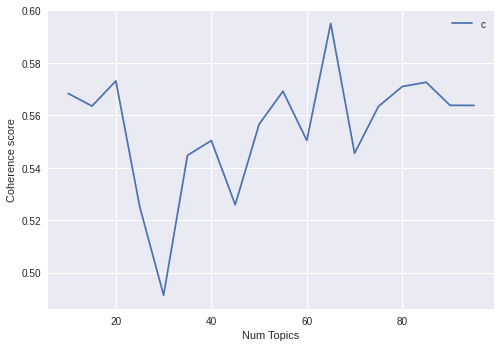

Num Topics = 10  has Coherence Value of 0.5683
Num Topics = 15  has Coherence Value of 0.5635
Num Topics = 20  has Coherence Value of 0.5731
Num Topics = 25  has Coherence Value of 0.5251
Num Topics = 30  has Coherence Value of 0.4914
Num Topics = 35  has Coherence Value of 0.5447
Num Topics = 40  has Coherence Value of 0.5503
Num Topics = 45  has Coherence Value of 0.5259
Num Topics = 50  has Coherence Value of 0.5565
Num Topics = 55  has Coherence Value of 0.5691
Num Topics = 60  has Coherence Value of 0.5504
Num Topics = 65  has Coherence Value of 0.595
Num Topics = 70  has Coherence Value of 0.5455
Num Topics = 75  has Coherence Value of 0.5633
Num Topics = 80  has Coherence Value of 0.571
Num Topics = 85  has Coherence Value of 0.5726
Num Topics = 90  has Coherence Value of 0.5638
Num Topics = 95  has Coherence Value of 0.5637


In [ ]:
limit=100; start=10; step=5
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))